In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading Titanic dataset, slicing into required columns, mapping strings to integer values and replacing NA with mean values in age

data = pd.read_csv("Titanic.csv")
data = data[["pclass", "sex", "age","sibsp","survived"]] 
data["pclass"] = data["pclass"].map({"1st":1,"2nd":2,"3rd":3})
data["sex"] = data["sex"].map({"male":0,"female":1})
data["age"].fillna((data["age"].mean()),inplace=True)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   sex       1309 non-null   int64  
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   survived  1309 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 61.4 KB


In [3]:
# Train test splitting the dataset

x = data.drop("survived", axis = 1)
y = data["survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 18)

print("Size of training data is ",len(x_train))
print("Size of test data is ",len(x_test))

Size of training data is  1047
Size of test data is  262


In [4]:
# Training a decision tree

tree = DecisionTreeClassifier(random_state = 18)
tree = tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

print(classification_report(y_test, y_pred))
print()
print("The accuracy is: ",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.77       153
           1       0.68      0.59      0.63       109

    accuracy                           0.71       262
   macro avg       0.71      0.70      0.70       262
weighted avg       0.71      0.71      0.71       262


The accuracy is:  0.7137404580152672


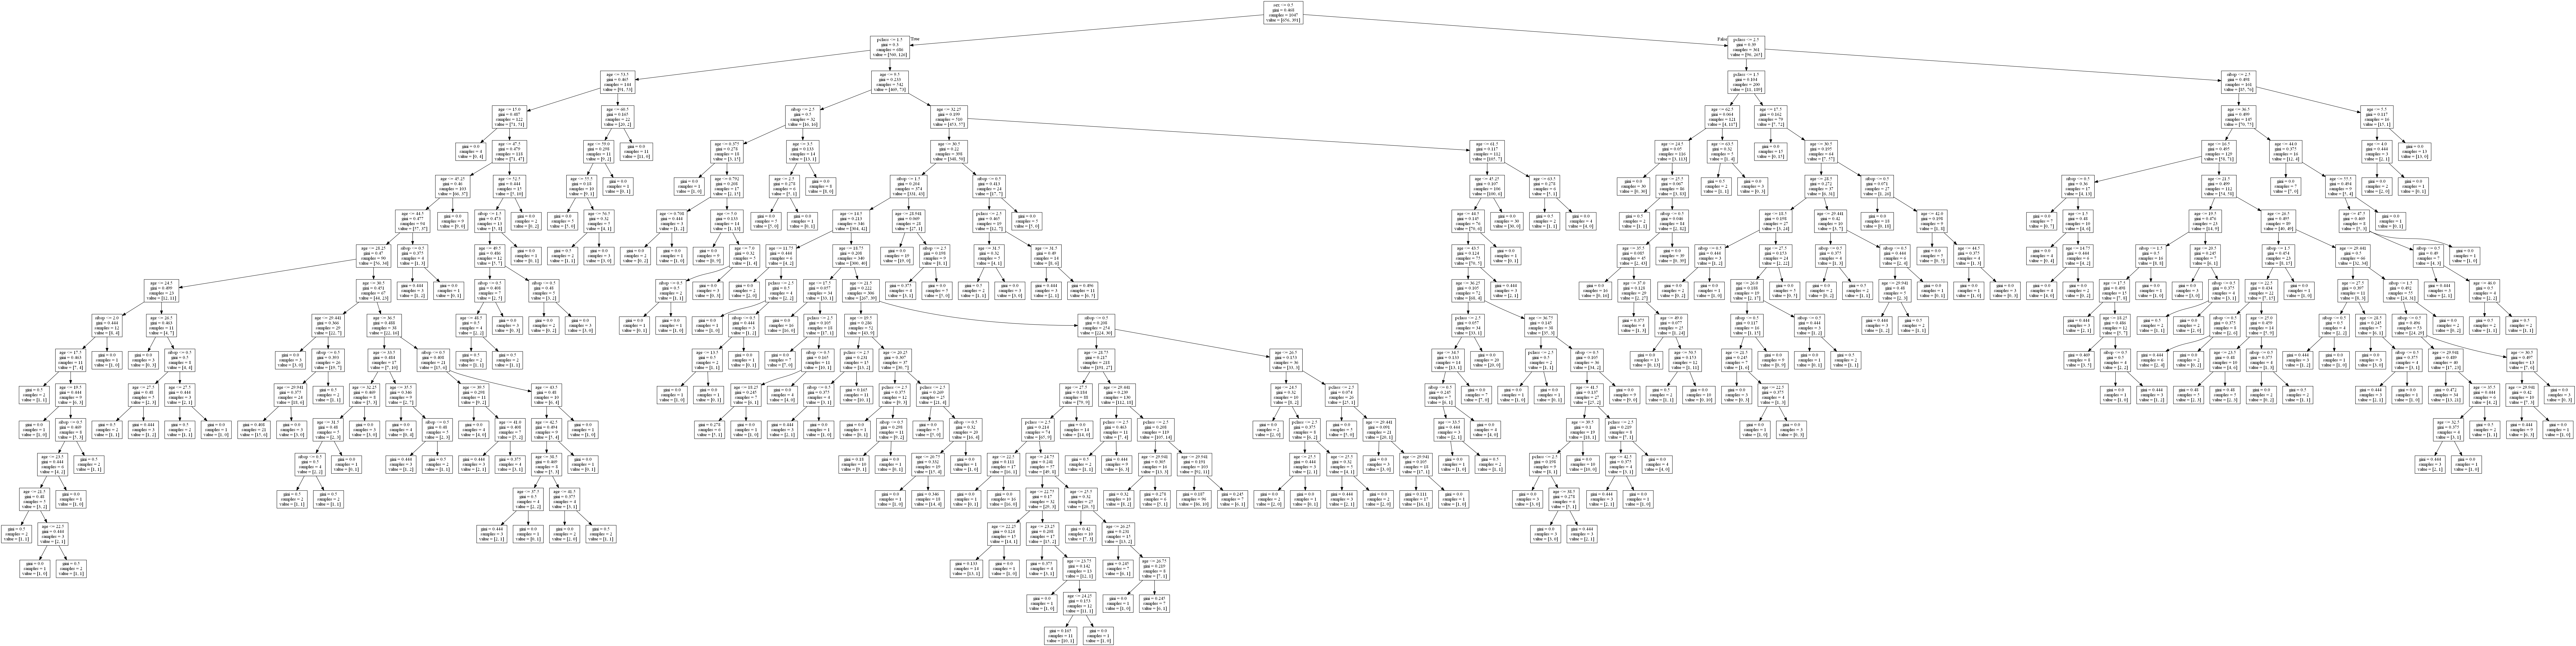

In [5]:
# Now we plot the entire tree
import pydotplus
from IPython.display import Image  

treeGraph = export_graphviz(tree, out_file=None,feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(treeGraph)
Image(graph.create_png())

In [6]:
# Finding best case parameters maximum leaf nodes

leaf_nodes = {'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11],}
clf = GridSearchCV(estimator=DecisionTreeClassifier(),
                     param_grid=leaf_nodes,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

clf.fit(x_train, y_train)

print("Best case parameters maximum leaf nodes is: ",clf.best_params_)
print()
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print("The accuracy is: ",accuracy_score(y_test, y_pred))

Best case parameters maximum leaf nodes is:  {'max_leaf_nodes': 7}

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       153
           1       0.74      0.72      0.73       109

    accuracy                           0.77       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.77      0.77      0.77       262

The accuracy is:  0.7748091603053435


The accuracy is:  0.7748091603053435
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       153
           1       0.74      0.72      0.73       109

    accuracy                           0.77       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.77      0.77      0.77       262



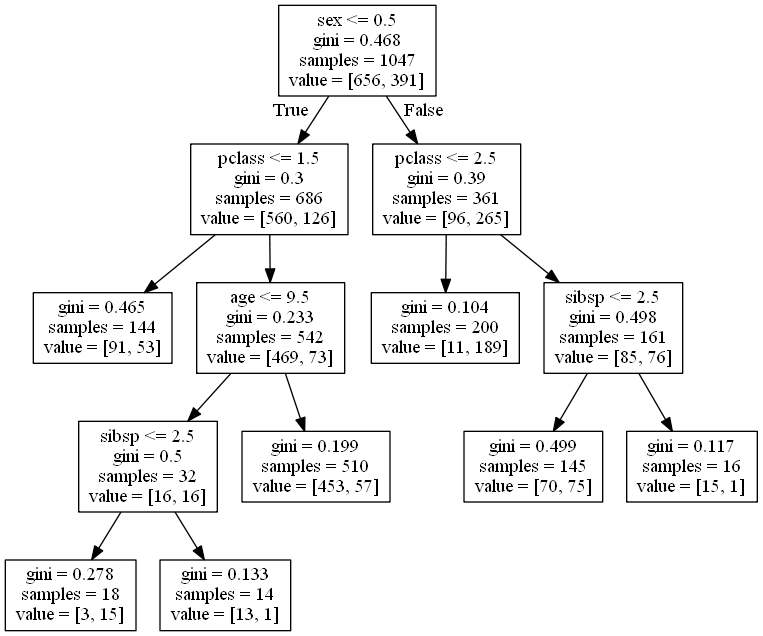

In [7]:
# Creating decision tree using grid search CV parameter

tree = DecisionTreeClassifier(**clf.best_params_, random_state = 18)
tree = tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

print("The accuracy is: ",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

treeGraph = export_graphviz(tree, out_file=None,feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(treeGraph)
Image(graph.create_png())

In [8]:
# Creating confusion matrix, for percent survivors in test set

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
survivor = TP/(TP+FN)
fataility = TN/(FP+TN)

print("percent survivors correctly predicted: {0:.2f}%".format(survivor*100))
print("percent fatalities correctly predicted: {0:.2f}%".format(fataility*100))

percent survivors correctly predicted: 71.56%
percent fatalities correctly predicted: 81.70%


In [9]:
# Creating the Random forest using the pruned tree

forest = RandomForestClassifier(**clf.best_params_,n_estimators = 50, random_state = 18)
forest = forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

print("The accuracy is: ",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy is:  0.7633587786259542
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       153
           1       0.73      0.68      0.70       109

    accuracy                           0.76       262
   macro avg       0.76      0.75      0.75       262
weighted avg       0.76      0.76      0.76       262



In [10]:
# Creating confusion matrix, for percent survivors in test set

conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0][0]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
survivor = TP/(TP+FN)
fataility = TN/(FP+TN)

print("percent survivors correctly predicted: {0:.2f}%".format(survivor*100))
print("percent fatalities correctly predicted: {0:.2f}%".format(fataility*100))

percent survivors correctly predicted: 67.89%
percent fatalities correctly predicted: 82.35%


### Accuracy Results

1. Decision Tree - Low accuracy (~71%)
2. Pruned Decision Tree - Low accuracy (~77%)
3. Random Forest using Decision Tree - Low accuracy (~82%)

GridSearchCV seems to increase the accuracy of the decision tree almost 6%. Further random forest accuracy is slightly higher than than the decision tree. 

However comparing the classification report, there is no significant difference overall difference in the methodologies.